## Imports

In [1]:
# Built-in
import datetime
import math

# Third-party
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

## Global Variables and Settings

In [2]:
COLUMN_MAP = {
    'rank': 3, 
    'name': 10,
    'team': 12,
    'value': 14,
}

DATE_FORMAT = '%B %d, %Y'

# <https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html>
plt.style.use('default')

## Main

#### Get HTML

In [3]:
url = 'https://www.espn.com/nba/stats'
response = requests.get(url)
response.raise_for_status()

#### Parse HTML

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all(class_="Table__TBODY")
table_headers = soup.find_all(class_='Table__TH')

res = []

for i, table in enumerate(tables):
    for row in table.find_all(class_='Table__TR'):
        if not row.find_all(class_='leaderCell__playerRank'):
            continue

        items = list(row.descendants)
            
        record = {
            'Category': table_headers[2 * i].text,
            'Player Rank': int(items[COLUMN_MAP['rank']]),
            'Player Name': items[COLUMN_MAP['name']],
            'Team': items[COLUMN_MAP['team']],
            'Value': float(items[COLUMN_MAP['value']]),
        }
        
        res.append(record)
        
df = pd.DataFrame(res)
df.head()

,Category,Player Name,Player Rank,Team,Value
0,Points,James Harden,1,HOU,34.4
1,Points,Bradley Beal,2,WSH,30.5
2,Points,Giannis Antetokounmpo,3,MIL,29.6
3,Points,Trae Young,3,ATL,29.6
4,Points,Damian Lillard,5,POR,28.9


## Plots

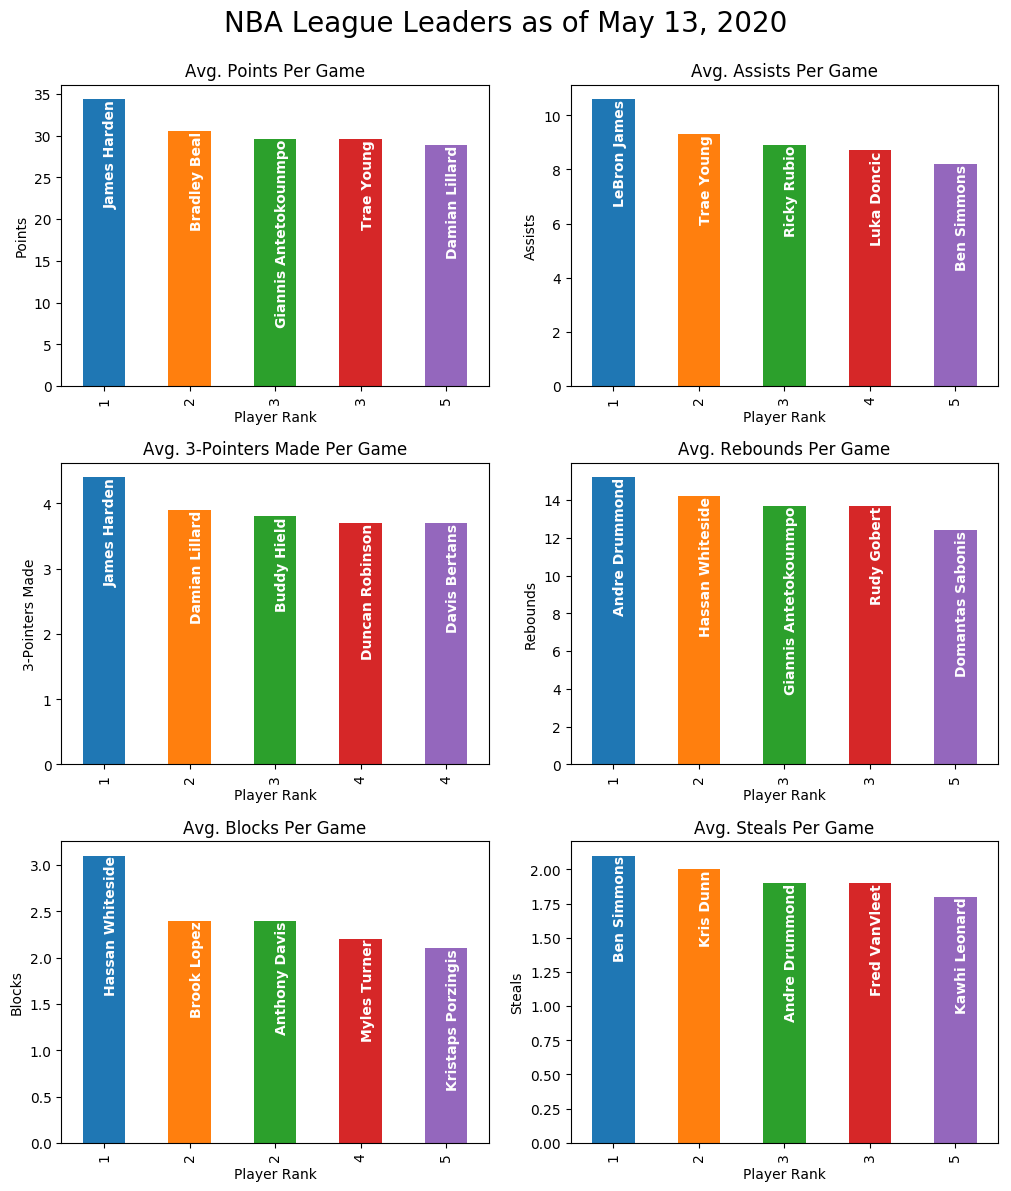

In [5]:
# Set up
date = datetime.datetime.now()
date_str = date.strftime(DATE_FORMAT)

x_col = 'Player Rank'
y_col = 'Value'
annotate_col = 'Player Name'

annotate_kwargs = {
    'color': 'white',
    'verticalalignment': 'top',
    'weight': 'extra bold'
}

categories = list(df['Category'].unique())

num_cols = 2
num_rows = math.ceil(len(categories) / 2)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12), constrained_layout=True)

fig.suptitle(f'NBA League Leaders as of {date_str}\n', fontsize=20)

# Plot each metric
for i, ax in enumerate(axes.flatten()):
    category = categories[i]
    sub = df.loc[df['Category'] == category]
    _ = sub.plot(x=x_col, y=y_col, ax=ax, kind='bar')

    # Annotate bars
    for j in range(len(sub)):
        row = sub.iloc[j]
        text = ax.annotate(row[annotate_col], xy=(j, row[y_col]), **annotate_kwargs)
        text.set_rotation(90)

    # Format plot
    ax.set_title(f'Avg. {category} Per Game')
    ax.set_xlabel(x_col)
    ax.set_ylabel(category)
    ax.legend().remove()

plt.show()